In [2]:
# basic imports 
import matplotlib.pyplot as plt 
from pathlib import Path 
from importlib import reload 

# Learning imports 
import torch 
import gymnasium as gym

# Custom imports 
from RLManager import * 
import MissileEnv

Misc Imports...
Torch imports...
Custom imports...
Finished imports.
Device: cpu


In [3]:
# Load the model fully trained model 
save_loc = Path('GameModel')
model = torch.load(save_loc / 'ModelTorch.pkl', weights_only=False)  # Needs access to DQN class 
# model = torch.load(Path('Archive') / 'CartPole_01' / 'ModelTorch.pkl', weights_only=False)

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [ ]:
# Test the model 
reload(MissileEnv)

# env = gym.make("CartPole-v1", render_mode='human')
# name = 'cart' 

env = MissileEnv.MissileEnv()
env.render_mode = 'human'
env.follow_missile = False
name = 'missile'

observation, info = env.reset()

# Run the model
n = 500
actions = []
da = (env.action_size-1)/2
for _ in range(n):
    print(f"Step {_}")
    # action = env.action_space.sample()
    state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)
    # action = (model(state).max(1).indices.view(1, 1)-da)/da
    action = model(state).max(1).indices.view(1, 1)
    actions.append((action.cpu().numpy()[0][0]-da)/da)
    observation,reward, terminated, truncated, info = env.step(action.item())
    # print("info : ",info);
    print(f"obs   : {observation}")
    
    if terminated or truncated:
        observation, info = env.reset()

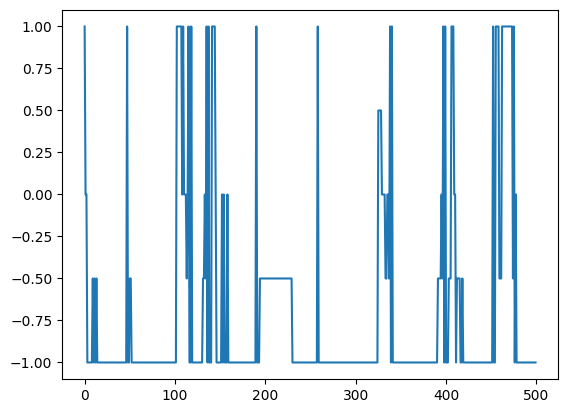

In [135]:
# actions[0].cpu().numpy()[0][0]
plt.plot(actions)

In [75]:
observation.shape
model

DQN(
  (layer1): Linear(in_features=4, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=2, bias=True)
)